# CNN For Jelly Classification 💙
> Names - IDs
*   Manar Alnahdi 2110890
*   Furat Alfarsi 2009624



# Import necessary libraries 💡

In [ ]:
import numpy as np
import os
import zipfile
from pathlib import Path
import shutil
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns

# Upload and Load the Dataset 📥

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
# Define file paths
main_zip_path = "/content/drive/MyDrive/Colab Notebooks/JellyFish.zip"
extraction_base_path = "/content/JellyFish_Data"

# Ensure extraction directory exists
Path(extraction_base_path).mkdir(parents=True, exist_ok=True)

# Extract the main zip file
with zipfile.ZipFile(main_zip_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_base_path)

Extracted folders: ['lions_images_temp.zip', 'barrel_images_temp.zip']


In [ ]:
# Paths to the sub zip files
lions_zip_path = os.path.join(extraction_base_path, "lions_images_temp.zip")
barrel_zip_path = os.path.join(extraction_base_path, "barrel_images_temp.zip")

# Directories for extracted data
lions_extraction_path = os.path.join(extraction_base_path, "lions")
barrel_extraction_path = os.path.join(extraction_base_path, "barrel")

# Create directories for extracted data
Path(lions_extraction_path).mkdir(parents=True, exist_ok=True)
Path(barrel_extraction_path).mkdir(parents=True, exist_ok=True)

# Extract lions images
with zipfile.ZipFile(lions_zip_path, 'r') as zip_ref:
    zip_ref.extractall(lions_extraction_path)

# Extract barrel images
with zipfile.ZipFile(barrel_zip_path, 'r') as zip_ref:
    zip_ref.extractall(barrel_extraction_path)

Lions folder contents (first 5 images): ['lions_images_temp']
Barrel folder contents (first 5 images): ['barrel_images_temp']


In [ ]:
# Count the number of images in each folder
lions_count = len(os.listdir(os.path.join(extraction_base_path, "lions")))
barrel_count = len(os.listdir(os.path.join(extraction_base_path, "barrel")))

print(f"Number of images in the 'lions' folder: {lions_count}")
print(f"Number of images in the 'barrel' folder: {barrel_count}")

Number of images in the 'lions' folder: 500
Number of images in the 'barrel' folder: 500


# Data Preprocessing and Splitting

In [ ]:
# Parameters
IMG_SIZE = 128  # Resize all images to 128x128
channels = 3    # Use 3 channels (RGB)

# Helper function to load and preprocess images
def preprocess_images(image_paths):
    images = []
    for img_path in image_paths:
        img = load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))  # Resize image
        img_array = img_to_array(img) / 255.0  # Normalize pixel values
        images.append(img_array)
    return np.array(images)

# Load images and labels
lions_path = os.path.join(extraction_base_path, "lions")
barrel_path = os.path.join(extraction_base_path, "barrel")

lions_images = [os.path.join(lions_path, img) for img in os.listdir(lions_path)]
barrel_images = [os.path.join(barrel_path, img) for img in os.listdir(barrel_path)]

# Combine data and create labels
images = lions_images + barrel_images
labels = [0] * len(lions_images) + [1] * len(barrel_images)  # 0 for lions, 1 for barrel

# Preprocess the images
images = preprocess_images(images)

# Split into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(
    images, labels, test_size=0.2, random_state=42, stratify=labels
)

print(f"Number of training images: {len(train_images)}")
print(f"Number of testing images: {len(test_images)}")

Number of training images: 800
Number of testing images: 200


# CNN Model

In [ ]:
# Define CNN model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, channels)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_images, np.array(train_labels),
    epochs=10, batch_size=32,
    validation_data=(test_images, np.array(test_labels))
)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images, np.array(test_labels))
print(f"Test accuracy: {test_acc * 100:.2f}%")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.5994 - loss: 0.6459 - val_accuracy: 0.7950 - val_loss: 0.5469
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.7206 - loss: 0.6629 - val_accuracy: 0.8400 - val_loss: 0.4120
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.8625 - loss: 0.3430 - val_accuracy: 0.8800 - val_loss: 0.2973
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.8782 - loss: 0.3109 - val_accuracy: 0.8550 - val_loss: 0.3190
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.8833 - loss: 0.2936 - val_accuracy: 0.8850 - val_loss: 0.2421
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.9160 - loss: 0.2062 - val_accuracy: 0.8850 - val_loss: 0.2403
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.9337 - loss: 0.1808 - val_accuracy: 0.8950 - val_loss: 0.2254
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9272 - loss: 0.1832 - val_accuracy: 0.9050 - val_loss:

# Evaluate Model Performance

7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 719ms/step
Classification Report:
              precision    recall  f1-score   support

       Lions       0.90      0.92      0.91       100
      Barrel       0.92      0.90      0.91       100

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.91      0.91       200



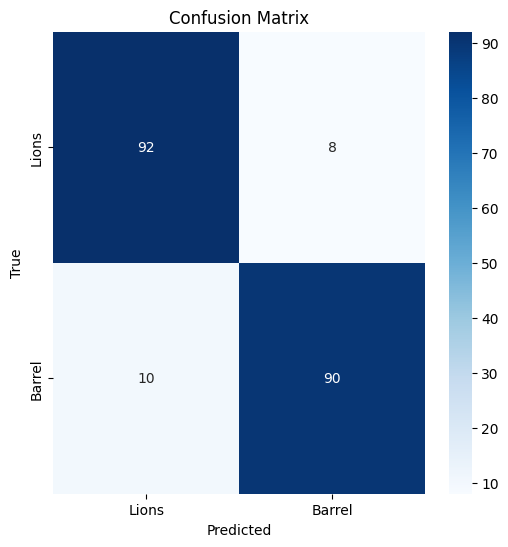

In [ ]:
# Predict on the test set
test_predictions = (model.predict(test_images) > 0.5).astype("int32")

# Classification Report
report = classification_report(test_labels, test_predictions, target_names=['Lions', 'Barrel'])
print("Classification Report:")
print(report)

# Confusion Matrix
conf_matrix = confusion_matrix(test_labels, test_predictions)

# Plot Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Lions', 'Barrel'], yticklabels=['Lions', 'Barrel'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()